In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lectura de Datos

train = pd.read_csv('train_df.csv') 
test = pd.read_csv('test_df.csv')

In [40]:
train.head(10)

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,pred,diff,cuad
0,0,1,60,65.000000,8450,7,5,2003,2003,196.0,...,0,0,0,0,2,2008,208500,342000.0,133500.0,1.782225e+10
1,1,2,20,80.000000,9600,6,8,1976,1976,0.0,...,0,0,0,0,5,2007,181500,252400.0,70900.0,5.026810e+09
2,2,3,60,68.000000,11250,7,5,2001,2002,162.0,...,0,0,0,0,9,2008,223500,357200.0,133700.0,1.787569e+10
3,3,4,70,60.000000,9550,7,5,1915,1970,0.0,...,0,0,0,0,2,2006,140000,343400.0,203400.0,4.137156e+10
4,4,5,60,84.000000,14260,8,5,2000,2000,350.0,...,0,0,0,0,12,2008,250000,439600.0,189600.0,3.594816e+10
5,5,6,50,85.000000,14115,5,5,1993,1995,0.0,...,320,0,0,700,10,2009,143000,272400.0,129400.0,1.674436e+10
6,6,7,20,75.000000,10084,8,5,2004,2005,186.0,...,0,0,0,0,8,2007,307000,338800.0,31800.0,1.011240e+09
7,7,8,60,70.049958,10382,7,6,1973,1973,240.0,...,0,0,0,350,11,2009,200000,418000.0,218000.0,4.752400e+10
8,8,9,50,51.000000,6120,7,5,1931,1950,0.0,...,0,0,0,0,4,2008,129900,354800.0,224900.0,5.058001e+10
9,9,10,190,50.000000,7420,5,6,1939,1950,0.0,...,0,0,0,0,1,2008,118000,215400.0,97400.0,9.486760e+09


In [4]:
train.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Paved

In [5]:
train[['GrLivArea','SalePrice']].head(5)

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

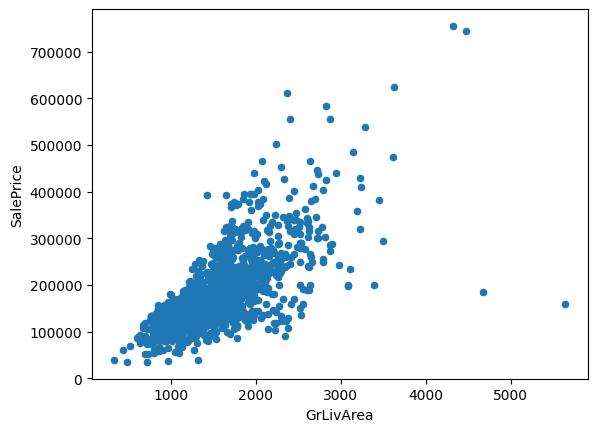

In [6]:
train.plot.scatter(
    x='GrLivArea',
    y='SalePrice'
)


In [7]:
# Trazando la Recta sobre nuestro Gráfico de Dispersión

In [8]:
train['GrLivArea'].min()

334

(0.0, 830500.0000000001)

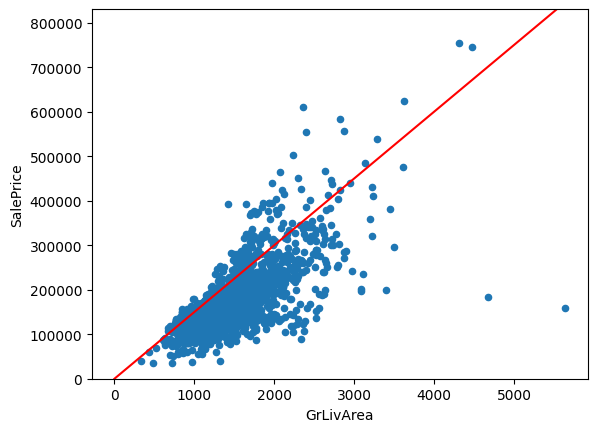

In [9]:
# Parametros de la recta

w = 150
b = 0

# puntos de la recta
x = np.linspace(0,train['GrLivArea'].max(),100)
y=w*x+b

#gráfica de la recta
train.plot.scatter(
    x='GrLivArea',
    y='SalePrice'
)

plt.plot(x,y,'r') 
plt.ylim(0,train['SalePrice'].max()*1.1)


In [10]:
### Si escogmos esos parametros para el modelo 

In [11]:
# Cálculo de las predicciones
train['pred'] = train['GrLivArea']*w+b

In [12]:
# Cálculo de la función de error

train['diff'] = train['pred']-train['SalePrice']
train['cuad'] = train['diff']**2
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred,diff,cuad
0,0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,...,0,0,2,2008,WD,Normal,208500,256500,48000,2304000000
1,1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,...,0,0,5,2007,WD,Normal,181500,189300,7800,60840000
2,2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,...,0,0,9,2008,WD,Normal,223500,267900,44400,1971360000
3,3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,...,0,0,2,2006,WD,Abnorml,140000,257550,117550,13818002500
4,4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,...,0,0,12,2008,WD,Normal,250000,329700,79700,6352090000


In [13]:
#Error Cuadrático Medio

ECM = train['cuad'].mean() 
ECM

5799776065.368493

### Encontrando el mínimo en ECM sabiendo que se encuentra entre 100 y 125

In [14]:
# Utilizamos linspace para generar 50 numeros aleatorios en el rango óptimo del ECM
# grid de la función de error basado en m, b=0 

w = np.linspace(50,200,50)   #arreglo de valores equiespaciados en el rango especificado
grid_error = pd.DataFrame(w, columns=['w'])
grid_error.head()

,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [15]:
# función del Error Cuadrático Medio

def sum_error(w,train):
    b=0
    train['pred'] = train['GrLivArea']*w+b
    train['diff'] = train['pred']-train['SalePrice']
    train['cuad'] = train['diff']**2
    return(train['cuad'].mean())

In [16]:
grid_error['error'] = grid_error['w'].apply(lambda x: sum_error(x,train=train))
grid_error.head()

,w,error
0,50.000000,1.509658e+10
1,53.061224,1.404857e+10
2,56.122449,1.304878e+10
3,59.183673,1.209720e+10
4,62.244898,1.119384e+10


<Axes: xlabel='w'>

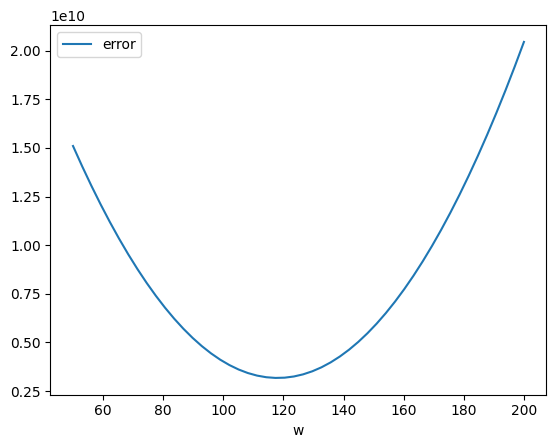

In [17]:
grid_error.plot(
    x='w',
    y='error'
)

In [18]:
# valor de w en que el valor de error es mínimo y cual es el ECM

w_opt = grid_error[grid_error['error'] == grid_error['error'].min()]
w_opt

,w,error
22,117.346939,3.178170e+09


### Ahora ya conocemos el Principio de Optimización para tener el menor ECM

#### Sklearn ya tiene las implementaciones para realizar esto a manera de función

In [19]:
# usar sklearn para conocer los valores óptimos

from sklearn.linear_model import LinearRegression


In [20]:
# definiendo input y output
x = np.array(train['GrLivArea']).reshape((-1,1))
y = np.array(train['SalePrice'])

In [21]:
# creando modelo
model = LinearRegression(fit_intercept=False)
model.fit(x,y)

LinearRegression(fit_intercept=False)

In [22]:
# imprimiendo parametros Óptimos para el modelo

print(f"Ordenada al origen (b): {model.intercept_}")
print(f"Pendiente (w): {model.coef_}")

Ordenada al origen (b): 0.0
Pendiente (w): [118.06909986]


### Análisis de correlación con Histograma y Ajuste Lineal con Seaborn

In [23]:
import seaborn as sns

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

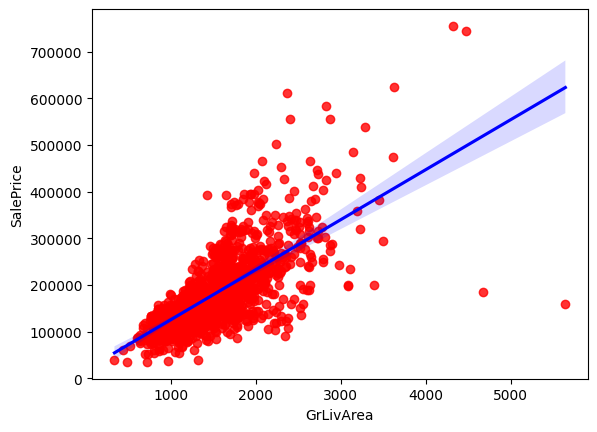

In [24]:
sns.regplot( x ='GrLivArea', y ='SalePrice', data = train, scatter_kws={'color' : 'red'}, line_kws = {"color":"blue"} )

In [25]:
### Obtengamos la correlación correcta 

# Primero filtramos del DataFrame train, aquellas columnas que son numéricas 

train = train.select_dtypes(include=['number'])
train.columns


Index(['Unnamed: 0', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'pred', 'diff', 'cuad'],
      dtype='object')

In [26]:
train_1 = train[['GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','PoolArea','SalePrice']]
train_1

,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,PoolArea,SalePrice
0,1710,2,1,3,1,0,208500
1,1262,2,0,3,1,0,181500
2,1786,2,1,3,1,0,223500
3,1717,1,0,3,1,0,140000
4,2198,2,1,4,1,0,250000
...,...,...,...,...,...,...,...
1455,1647,2,1,3,1,0,175000
1456,2073,2,0,3,1,0,210000
1457,2340,2,0,4,1,0,266500
1458,1078,1,0,2,1,0,142125


In [27]:
# Matriz de Correlaciones 
train_1.corr()  #pearson, kendall, spearman

,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,PoolArea,SalePrice
GrLivArea,1.000000,0.630012,0.415772,0.521270,0.100063,0.170205,0.708624
FullBath,0.630012,1.000000,0.136381,0.363252,0.133115,0.049604,0.560664
HalfBath,0.415772,0.136381,1.000000,0.226651,-0.068263,0.022381,0.284108
BedroomAbvGr,0.521270,0.363252,0.226651,1.000000,0.198597,0.070703,0.168213
KitchenAbvGr,0.100063,0.133115,-0.068263,0.198597,1.000000,-0.014525,-0.135907
PoolArea,0.170205,0.049604,0.022381,0.070703,-0.014525,1.000000,0.092404
SalePrice,0.708624,0.560664,0.284108,0.168213,-0.135907,0.092404,1.000000


Text(0.5, 1.0, 'Análisis de Correlación con respecto a Parametros de interés Intuitivos')

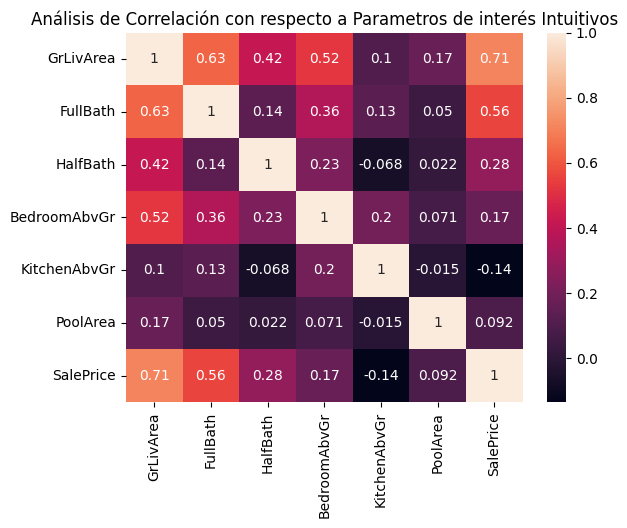

In [28]:
# Heat Map con SeaBorn para Análisis de Correlación
correlation_matrix = train_1.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Análisis de Correlación con respecto a Parametros de interés Intuitivos')

## Análisis completo de todas las variables numéricas en el DF 'Train'

In [33]:
len(train.columns)

42

In [48]:
train_corr = train.corr()
train_corr_top = train_corr[['SalePrice']].sort_values(by='SalePrice',ascending = False)
train_corr_top = train_corr_top[train_corr_top['SalePrice'] >= 0.5]
train_corr_top
# train_corr_top
# # sns.heatmap(train_corr, annot = True)
# # plt.title ('Correlación entre Todas la Variables y Precio Final')

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
pred,0.708624
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723


# Parametros significativos en el Precio de la Casa

<Axes: >

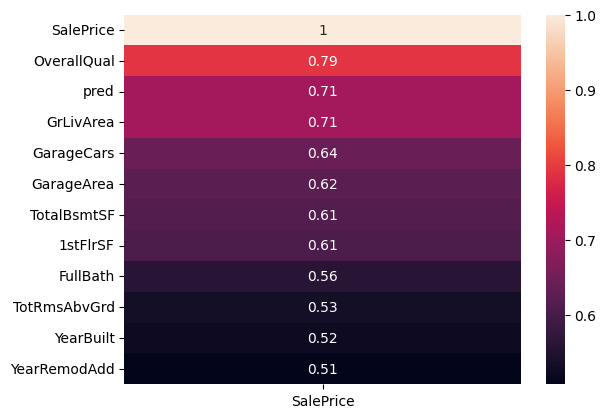

In [49]:

sns.heatmap(train_corr_top,annot=True)